# ISA post-process

**Goal:** When I'm training the `Invariant-Slot-Attention` notebook, it seems like some of these predictions are _super close_ to perfect, and maybe if I  assigned slots based on distance to the ring defined by the com and spread this would make these predictions practically perfect?

In [12]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Step 1:** Look at the training loss.

In [13]:
cID_prev = 'isa-cosine-decay'
# lastIter = 39_000
modelDir = f'../code/models/{cID_prev}/'
os.listdir(modelDir)

['m_10000.pt',
 'm_25000.pt',
 'm_-2.pt',
 'm_4000.pt',
 'm_15000.pt',
 'm_39000.pt',
 'm_29000.pt',
 'm_36000.pt',
 'm_23000.pt',
 'm_27000.pt',
 'm_19000.pt',
 'm_26000.pt',
 'm_9000.pt',
 'm_37000.pt',
 'm_16000.pt',
 'm_21000.pt',
 'm_8000.pt',
 'm_-1.pt',
 'm_6000.pt',
 'loss.json',
 'm_31000.pt',
 'm_35000.pt',
 'm_2000.pt',
 'm_14000.pt',
 'm_3000.pt',
 'm_32000.pt',
 'm_28000.pt',
 'm_17000.pt',
 'm_18000.pt',
 'm_34000.pt',
 'm_7000.pt',
 'm_11000.pt',
 'm_30000.pt',
 'm_33000.pt',
 'm_0.pt',
 'm_1000.pt',
 'm_20000.pt',
 'm_5000.pt',
 'm_24000.pt',
 'm_12000.pt',
 'm_13000.pt',
 'm_38000.pt',
 'm_22000.pt']

In [20]:
with open(f'{modelDir}/loss.json') as f:
    ld = pd.Series(json.load(f))

Text(0, 0.5, 'BCE Loss')

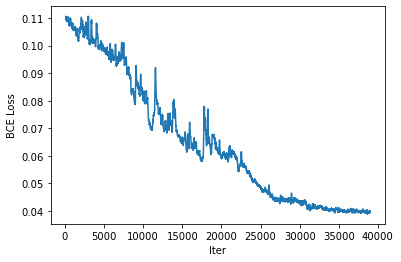

In [28]:
plt.plot(ld.rolling(100).mean())
plt.xlabel('Iter')
plt.ylabel('BCE Loss')

In [32]:
ld.rolling(100).mean().tail()

38996    0.039460
38997    0.039465
38998    0.039533
38999    0.039516
39000    0.039599
dtype: float64

**Goal:** Clean up this prediction with a post-processing 